In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import re

In [76]:
df  = pd.read_csv('PreProcessedDataLonelyCombined.csv')
df = df[df['processed_text'].notna()]
text_data = list(df['processed_text'])
text_data[:5]
# df  = pd.read_csv('lonely_labeled_preprocessed.csv')
# text_data = list(df['processed_text'])
# text_data[:5]

['struggling lately im recently ive feeling really unmotivated used enjoy school dont care anything cant concentrate want sleep day dont want talk parent',
 'went hospital suicidal thought went hospital active plan everything sent home ive many time edit coping mechanism idea would appreciated thanks',
 'people love people love ive thinking write keep starting stopping nothing ever feel like enough explain something thats quietly unraveling inside long say goodbye youve ever wanted keep holding truth im tired sleepy worn outi mean kind tired sits deep bone kind amount sleep sunshine talking fix ive tried keep going keep smiling keep version know love inside heavy long im sorry im sorry come isnt one thing one moment slow burna daily battle thought dont quiet pain doesnt ease feeling lost world keep moving ive fought silently didnt want worry didnt want burden truth ive struggling way couldnt always put word ive felt invisible overwhelmed even surrounded love even knew deeply cared coul

In [77]:
df['lonely'] = df['lonely'].replace('t', 'T')
df['lonely'].value_counts()

KeyError: 'lonely'

In [ ]:
def get_n_frequent_words(text, n=10):
    words = re.findall(r'\b\w+\b', text.lower())
    word_counts = Counter(words)
    return word_counts.most_common(n)

In [ ]:
loneliness_values = df['lonely'].unique()
loneliness_values

KeyError: 'lonely'

In [ ]:
n = 20
for label in loneliness_values:
    class_texts = df[df['lonely'] == label]['processed_text']
    combined_text = ' '.join(class_texts)
    top_words = get_n_frequent_words(combined_text, n)
    print(f'Top {n} words for {label} class:')
    print(top_words)

KeyError: 'lonely'

In [ ]:
v = TfidfVectorizer()
transformed_output = v.fit_transform(text_data)
print(transformed_output)
print(v.vocabulary_)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 72233 stored elements and shape (1180, 8760)>
  Coords	Values
  (0, 7438)	0.24491410941689182
  (0, 4350)	0.237243215653456
  (0, 3816)	0.08800299635828193
  (0, 6215)	0.20951645848826095
  (0, 4164)	0.121963418300959
  (0, 2866)	0.1433723266023592
  (0, 6192)	0.13021369661648122
  (0, 8195)	0.4145591224939079
  (0, 8277)	0.20013370823108498
  (0, 2527)	0.24094780713656233
  (0, 6694)	0.19051407047235555
  (0, 2249)	0.19595128383123325
  (0, 1126)	0.16950157226183243
  (0, 376)	0.15732739323576017
  (0, 1114)	0.14009959840904407
  (0, 1490)	0.4145591224939079
  (0, 8417)	0.2353612571046286
  (0, 7069)	0.23490262934778117
  (0, 1844)	0.1374097390564211
  (0, 7632)	0.14073906577227088
  (0, 5525)	0.2020165418533877
  (1, 4164)	0.09802072466111997
  (1, 8507)	0.32574894910672086
  (1, 3691)	0.4973674364673754
  (1, 7513)	0.22493588551583735
  :	:
  (1179, 8697)	0.11980937027542587
  (1179, 448)	0.07263704657082985
  (1179, 5682

In [ ]:
feature_names = v.get_feature_names_out()
feature_names


array(['ab', 'aback', 'abandon', ..., 'zopiclone', 'zu', 'zukunft'],
      shape=(8760,), dtype=object)

In [ ]:
for word in feature_names:
    index = v.vocabulary_.get(word)

    idf_score = v.idf_[index]

    print(f'{word} = {idf_score}')

ab = 7.380969635637417
aback = 6.975504527529253
abandon = 6.282357346969308
abandoned = 5.876892238861143
abandonment = 6.128206667142049
aber = 7.380969635637417
ability = 5.240903472141146
abit = 7.380969635637417
able = 3.6796676615249235
abnormally = 7.380969635637417
abomination = 7.380969635637417
aboutmaybe = 7.380969635637417
abram = 7.380969635637417
abroad = 5.994675274517526
abruptly = 6.975504527529253
absence = 6.687822455077471
absent = 7.380969635637417
absolute = 6.464678903763262
absolutely = 4.672919434535206
abstract = 6.687822455077471
abt = 6.975504527529253
abundantly = 7.380969635637417
abuse = 5.3015280939575815
abused = 6.282357346969308
abuser = 7.380969635637417
abusing = 7.380969635637417
abusive = 5.129677837030922
abysmal = 7.380969635637417
abyss = 7.380969635637417
academia = 7.380969635637417
academic = 5.994675274517526
academically = 7.380969635637417
accent = 6.687822455077471
accept = 4.360544749493055
acceptable = 6.975504527529253
acceptance = 6.

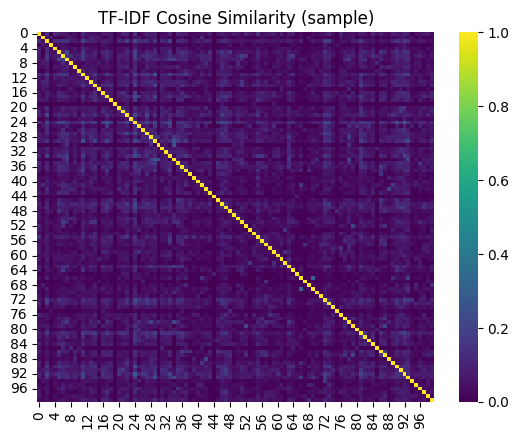

In [78]:
sample_sim = cosine_sim_matrix[:100, :100]
sns.heatmap(sample_sim, cmap='viridis')
plt.title('TF-IDF Cosine Similarity (sample)')
plt.show()


In [79]:
import numpy as np
masked_sim = cosine_sim_matrix[~np.eye(cosine_sim_matrix.shape[0],dtype=bool)]
print("Avg Similarity:", masked_sim.mean())
print("Max Similarity:", masked_sim.max())
print("Min Similarity:", masked_sim.min())

Avg Similarity: 0.04460974914166894
Max Similarity: 1.0000000000000007
Min Similarity: 0.0


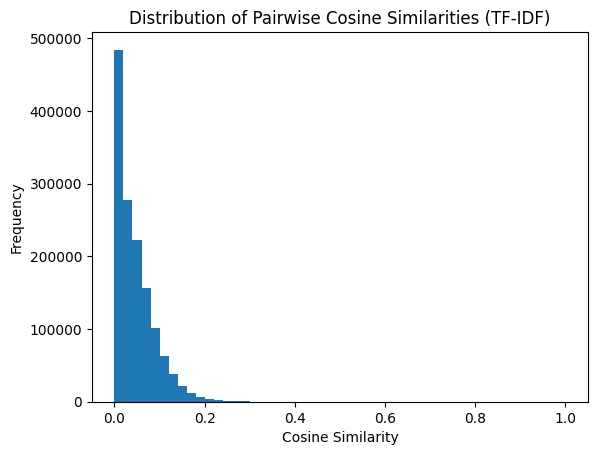

In [80]:
plt.hist(masked_sim, bins=50)
plt.title('Distribution of Pairwise Cosine Similarities (TF-IDF)')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

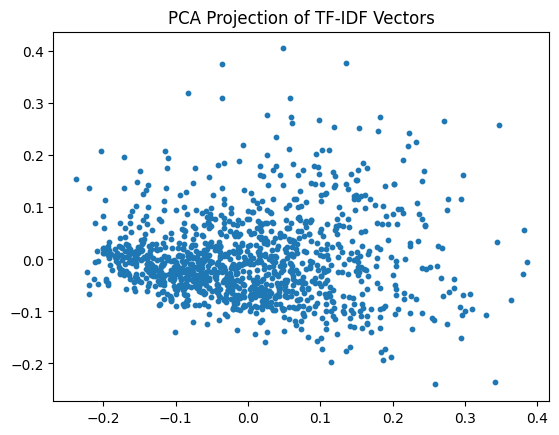

In [82]:
from sklearn.decomposition import PCA

reduced = PCA(n_components=2).fit_transform(transformed_output.toarray())
plt.scatter(reduced[:, 0], reduced[:, 1], s=10)
plt.title("PCA Projection of TF-IDF Vectors")
plt.show()

**Model Training**